# Preprocessing
After collecting the original data, I applied a bandpass filter from 20-200 hz and notch filters at 60, 120, and 180 hz. I then extracted 2 second oral preparation and swallow signals from the data using visual inspection. Within the data directory, each folder name is the substance name and the volume swallowed (if applicable) of the data contained within it.

In [1]:
import os
import pandas as pd
import random
import shutil

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\07_18_25\extracted signals'
class_folders = os.listdir(data_path)
example_class = class_folders[0]
example_files = os.listdir(os.path.join(data_path, example_class))

# File organization
print(class_folders)
print(example_class)
print(example_files)

def num_files(data_path):
    df = []
    
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            df.append((class_name, num_files))

    return pd.DataFrame(df, columns=['Class', 'Num Files'])

num_files(data_path)

['apple 10', 'apple 20', 'dry swallow 0', 'jelly 10', 'milk 10', 'milk 20', 'oral prep 0', 'redu oral prep 0', 'water 10', 'water 20', 'yogurt 10', 'yogurt 20']
apple 10
['1.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '2.txt', '20.txt', '21.txt', '22.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '29.txt', '3.txt', '30.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']


,Class,Num Files
0,apple 10,30
1,apple 20,30
2,dry swallow 0,30
3,jelly 10,30
4,milk 10,29
5,milk 20,30
6,oral prep 0,304
7,redu oral prep 0,30
8,water 10,29
9,water 20,29


Since I extracted a lot more oral preparation signals, I'll randomly select 30 to use for training.

In [2]:
oral_prep = os.path.join(data_path, 'oral prep 0')
redu_oral_prep = os.path.join(data_path, 'redu oral prep 0')

if os.path.exists(redu_oral_prep):
    shutil.rmtree(redu_oral_prep)

os.makedirs(redu_oral_prep)

files = [f for f in os.listdir(oral_prep) if os.path.isfile(os.path.join(oral_prep, f))]
sampled_files = random.sample(files, 30)

for file in sampled_files:
    shutil.copy(os.path.join(oral_prep, file), os.path.join(redu_oral_prep, file))

In [3]:
num_files(data_path)

,Class,Num Files
0,apple 10,30
1,apple 20,30
2,dry swallow 0,30
3,jelly 10,30
4,milk 10,29
5,milk 20,30
6,oral prep 0,304
7,redu oral prep 0,30
8,water 10,29
9,water 20,29


In [4]:
# Displaying an example file
example_df = pd.read_csv(os.path.join(data_path, example_class, example_files[0]), delimiter = ",", header = None)
example_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.931943,0.580398,-2.617770,-2.63291,-2.49192,-2.338830,-6.32094,-3.00732,2.534970,-3.65960,...,-4.650450,-2.80475,-9.73586,-2.300790,-203.496,-808.128,-546.560,0,-840,980
1,-1.080380,-4.350310,-5.558490,-7.44053,-5.23809,-3.542460,-6.39328,-2.97921,-0.052661,-5.52033,...,-7.638480,-5.64212,-12.17180,-3.850180,-204.472,-810.568,-548.024,140,-700,700
2,-6.562740,-12.376400,-9.318080,-11.53360,-8.50107,-3.662280,-4.78484,-4.70124,-7.138650,-7.77185,...,-7.731580,-6.40956,-9.74225,-4.530990,-205.936,-807.640,-549.488,0,-840,420
3,-5.383180,-5.762740,-3.783660,-2.52458,-1.57109,-1.337210,3.30839,-1.59844,-6.017720,-2.77572,...,-3.837150,-3.24537,2.77804,1.772790,-204.472,-810.568,-545.584,-140,-700,140
4,-5.614450,-6.325730,-5.975540,-4.17685,-4.67983,-2.085240,1.02971,-5.32141,-7.041360,-3.00374,...,-4.904070,-4.41329,1.72501,-2.523750,-203.984,-812.032,-547.536,-280,-980,-140
5,-8.302160,-2.892270,-5.675760,1.41151,-2.21092,-0.530258,5.20242,-2.37527,-7.745690,-6.09887,...,-4.696660,-2.25698,7.66679,-0.210486,-204.472,-813.496,-546.072,-560,-840,-140
6,-7.884810,2.692050,-0.372327,8.14857,4.43490,1.696870,8.17682,4.64849,-6.692410,-4.16931,...,-2.230450,1.17492,11.45660,3.782400,-203.008,-814.960,-543.632,-420,-1120,-140
7,-5.239380,2.829910,-0.771932,8.63952,3.13986,2.777250,9.09593,6.28209,-3.286490,-5.51884,...,0.613874,2.65872,9.95769,2.692640,-204.960,-815.936,-545.096,-560,-1120,-140
8,2.541980,5.497010,1.824030,4.86180,2.13175,3.067140,5.53702,7.05095,2.162980,1.07878,...,2.752310,1.61414,2.01877,0.427266,-203.008,-816.424,-545.096,-420,-1120,0
9,4.667070,2.276790,1.161260,-1.76668,-3.60822,1.772560,-2.46955,2.45118,0.764105,3.70913,...,4.580150,1.16937,-5.35127,-5.428580,-204.960,-817.888,-546.560,-420,-980,0


In [5]:
print(example_df.shape)

(1000, 22)


# Feature Extraction
I got some of these features and functions from this link: https://www.kaggle.com/code/calulamabel/emg-hand-gesture-classification/notebook

In [6]:
import numpy as np

# mean absolute value
def mav(data):
    return np.mean(np.abs(data), axis=0)

# root mean square
def rms(data):
    return np.sqrt(np.mean(data**2,axis=0))  
    
# wavelength
def wavelength(data):
    return np.sum(np.abs(np.diff(data)), axis=0)
    
# zero crossing rate
def zcr(data):
    return np.sum(np.diff(np.sign(data), axis=0) != 0, axis=0) / (len(data)-1)

# variance
def var(data):
    return np.var(data, axis=0)

# absolute difference
def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

# mean frequency
def mean_freq(data, fs=500):
    freqs = np.fft.rfftfreq(len(data), d=1/fs)
    spectrum = np.abs(np.fft.rfft(data))**2
    return np.sum(freqs * spectrum) / np.sum(spectrum)

# median frequency
def median_freq(data, fs=500):
    freqs = np.fft.rfftfreq(len(data), d=1/fs)
    spectrum = np.abs(np.fft.rfft(data))**2
    cumulative = np.cumsum(spectrum)
    total = cumulative[-1]
    med_idx = np.searchsorted(cumulative, total / 2)
    return freqs[med_idx]

# peak frequency
def peak_freq(data, fs=500):
    freqs = np.fft.rfftfreq(len(data), d=1/fs)
    spectrum = np.abs(np.fft.rfft(data))**2
    peak_idx = np.argmax(spectrum)
    return freqs[peak_idx]

In [7]:
# example of how features will be organized for each file
example_df['class'] = example_class.rstrip('.txt')
example_df[['substance', 'volume']] = example_df['class'].str.split(' ', expand=True)
example_df = example_df.drop(columns=['class'])
example_df_grouped = example_df.groupby(['substance', 'volume'])

features = example_df_grouped.agg(['min', 'max', mav, rms, wavelength, zcr, var, abs_diffs_signal, mean_freq, median_freq, peak_freq])
features

0                                              \
                      min      max        mav        rms   wavelength   
substance volume                                                        
apple     10     -89.8215  73.5244  10.123081  15.526914  8511.370464   

                                                                    \
                       zcr         var abs_diffs_signal  mean_freq   
substance volume                                                     
apple     10      0.271271  241.085047      8511.370464  67.493364   

                              ...     21                                   \
                 median_freq  ...    max      mav          rms wavelength   
substance volume              ...                                           
apple     10            65.5  ...  14560  3322.06  4634.416598     426580   

                                                                     \
                       zcr           var abs_diffs_signal mean_freq   
substance volume                                                      
apple     10      0.067067  2.147730e+07           426580  6.866916   

                                        
                 median_freq peak_freq  
substance volume                        
apple     10             4.0       2.5  

[1 rows x 242 columns]

In [8]:
df = pd.DataFrame()

class_map = {}
i = 0

for class_name in os.listdir(data_path):
    if class_name == 'oral prep 0':
        continue
        
    class_path = os.path.join(data_path, class_name)
    class_str = class_name.rstrip('.txt')
    parts = class_str.split()
    volume = parts[-1]
    substance = ' '.join(parts[:-1])
    
    for sample_name in os.listdir(class_path):
        sample_df = pd.read_csv(os.path.join(data_path, class_name, sample_name), delimiter = ",", header = None)
        sample_df.columns = [f"channel {i+1}" for i in range(sample_df.shape[1])]
        if substance not in class_map:
            class_map[substance] = i
            i += 1
        
        sample_df['substance'] = substance
        sample_df['volume'] = volume
        sample_df_grouped = sample_df.groupby(['substance', 'volume'])
        
        features_df = sample_df_grouped.agg(['min', 'max', mav, rms, wavelength, zcr, var, abs_diffs_signal, mean_freq, median_freq, peak_freq])
        df = pd.concat([df, features_df])

df.reset_index(inplace=True)
df

substance volume channel 1                                                \
                           min       max        mav        rms    wavelength   
0       apple     10  -89.8215   73.5244  10.123081  15.526914   8511.370464   
1       apple     10 -113.9200   86.1073   9.896790  16.791919   8262.519721   
2       apple     10  -82.3953   84.7438  10.532140  16.572327   8938.223938   
3       apple     10 -194.0030  125.6940  11.846242  20.842131   9634.231501   
4       apple     10 -117.7260   84.5021  11.854229  18.994828   9543.440074   
..        ...    ...       ...       ...        ...        ...           ...   
318    yogurt     20  -69.3289   69.5755  10.175371  15.426147   8874.451929   
319    yogurt     20  -86.3076   74.0248  11.288252  18.020237   9792.563997   
320    yogurt     20  -93.5527   91.9620  11.081596  17.163182   8838.968969   
321    yogurt     20  -95.3684   61.4933  11.031382  16.758005   9634.328738   
322    yogurt     20  -95.7571   91.9919  13.782139  20.737838  11234.928474   

                                            ... channel 22           \
          zcr         var abs_diffs_signal  ...        max      mav   
0    0.271271  241.085047      8511.370464  ...      14560  3322.06   
1    0.290290  281.968302      8262.519721  ...      12040  4038.86   
2    0.274274  274.641479      8938.223938  ...      14560  4577.86   
3    0.250250  434.394440      9634.231501  ...      22260  5437.88   
4    0.257257  360.801618      9543.440074  ...      15400  5531.54   
..        ...         ...              ...  ...        ...      ...   
318  0.279279  237.965865      8874.451929  ...      18760  3136.98   
319  0.273273  324.728936      9792.563997  ...      11200  3865.40   
320  0.254254  294.572930      8838.968969  ...      13580  4293.94   
321  0.288288  280.830702      9634.328738  ...      12040  3813.46   
322  0.265265  430.057924     11234.928474  ...      14280  3783.08   

                                                                      \
             rms wavelength       zcr           var abs_diffs_signal   
0    4634.416598     426580  0.067067  2.147730e+07           426580   
1    4996.715521     449540  0.040040  2.476357e+07           449540   
2    5597.687773     391580  0.036036  3.078873e+07           391580   
3    6691.171078     458780  0.031031  4.119861e+07           458780   
4    6675.993619     353780  0.026026  4.449073e+07           353780   
..           ...        ...       ...           ...              ...   
318  4313.488379     329560  0.043043  1.854732e+07           329560   
319  5367.578821     396620  0.036036  2.879051e+07           396620   
320  5302.465577     390740  0.035035  2.811149e+07           390740   
321  5118.934928     390040  0.047047  2.616131e+07           390040   
322  4801.379552     462560  0.058058  2.290177e+07           462560   

                                     
    mean_freq median_freq peak_freq  
0    6.866916         4.0       2.5  
1    5.226880         1.5       1.5  
2    3.448059         1.0       0.5  
3    4.439223         1.0       0.5  
4    2.640694         1.0       0.5  
..        ...         ...       ...  
318  6.230145         3.5       2.5  
319  5.266034         2.5       2.0  
320  4.882148         3.0       2.5  
321  5.639875         3.5       2.5  
322  6.510082         4.0       2.5  

[323 rows x 244 columns]

In [9]:
print(class_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'redu oral prep': 4, 'water': 5, 'yogurt': 6}


In [10]:
df['substance'] = df['substance'].map(class_map)
df

substance volume channel 1                                                \
                           min       max        mav        rms    wavelength   
0           0     10  -89.8215   73.5244  10.123081  15.526914   8511.370464   
1           0     10 -113.9200   86.1073   9.896790  16.791919   8262.519721   
2           0     10  -82.3953   84.7438  10.532140  16.572327   8938.223938   
3           0     10 -194.0030  125.6940  11.846242  20.842131   9634.231501   
4           0     10 -117.7260   84.5021  11.854229  18.994828   9543.440074   
..        ...    ...       ...       ...        ...        ...           ...   
318         6     20  -69.3289   69.5755  10.175371  15.426147   8874.451929   
319         6     20  -86.3076   74.0248  11.288252  18.020237   9792.563997   
320         6     20  -93.5527   91.9620  11.081596  17.163182   8838.968969   
321         6     20  -95.3684   61.4933  11.031382  16.758005   9634.328738   
322         6     20  -95.7571   91.9919  13.782139  20.737838  11234.928474   

                                            ... channel 22           \
          zcr         var abs_diffs_signal  ...        max      mav   
0    0.271271  241.085047      8511.370464  ...      14560  3322.06   
1    0.290290  281.968302      8262.519721  ...      12040  4038.86   
2    0.274274  274.641479      8938.223938  ...      14560  4577.86   
3    0.250250  434.394440      9634.231501  ...      22260  5437.88   
4    0.257257  360.801618      9543.440074  ...      15400  5531.54   
..        ...         ...              ...  ...        ...      ...   
318  0.279279  237.965865      8874.451929  ...      18760  3136.98   
319  0.273273  324.728936      9792.563997  ...      11200  3865.40   
320  0.254254  294.572930      8838.968969  ...      13580  4293.94   
321  0.288288  280.830702      9634.328738  ...      12040  3813.46   
322  0.265265  430.057924     11234.928474  ...      14280  3783.08   

                                                                      \
             rms wavelength       zcr           var abs_diffs_signal   
0    4634.416598     426580  0.067067  2.147730e+07           426580   
1    4996.715521     449540  0.040040  2.476357e+07           449540   
2    5597.687773     391580  0.036036  3.078873e+07           391580   
3    6691.171078     458780  0.031031  4.119861e+07           458780   
4    6675.993619     353780  0.026026  4.449073e+07           353780   
..           ...        ...       ...           ...              ...   
318  4313.488379     329560  0.043043  1.854732e+07           329560   
319  5367.578821     396620  0.036036  2.879051e+07           396620   
320  5302.465577     390740  0.035035  2.811149e+07           390740   
321  5118.934928     390040  0.047047  2.616131e+07           390040   
322  4801.379552     462560  0.058058  2.290177e+07           462560   

                                     
    mean_freq median_freq peak_freq  
0    6.866916         4.0       2.5  
1    5.226880         1.5       1.5  
2    3.448059         1.0       0.5  
3    4.439223         1.0       0.5  
4    2.640694         1.0       0.5  
..        ...         ...       ...  
318  6.230145         3.5       2.5  
319  5.266034         2.5       2.0  
320  4.882148         3.0       2.5  
321  5.639875         3.5       2.5  
322  6.510082         4.0       2.5  

[323 rows x 244 columns]

In [11]:
df.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\clean_df.csv', index=False)

# Single Label Classification
### Substance

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

x = df.drop(columns=['volume', 'substance'])
y = df['substance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)  
print(y_train.shape)  

(258, 242)
(258,)


C:\Users\chloe\AppData\Local\Temp\ipykernel_29956\3354761790.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# joint accuracies
models = []
model_accuracies = []
model_precisions = []
model_recalls = []
model_f1scores = []

def train_and_plot_model(model, model_name):
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    model_confusion_matrix = confusion_matrix(y_test, y_pred)

    models.append(model_name)
    model_accuracies.append(accuracy * 100)
    model_precisions.append(precision * 100)
    model_recalls.append(recall * 100)
    model_f1scores.append(f1score * 100)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1score:.4f}')
    print('----------------------------')
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(model_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### SVM
The lines below are taken from here: https://www.kaggle.com/code/calulamabel/emg-hand-gesture-classification/notebook

Accuracy: 0.9692
Precision: 0.9703
Recall: 0.9692
F1 score: 0.9691
----------------------------


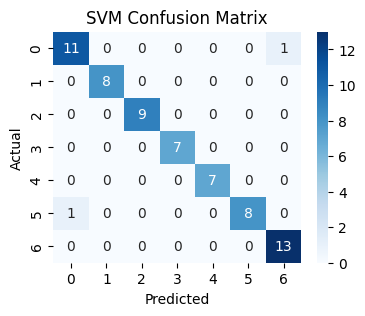

In [40]:
svm_model = svm.SVC(kernel='linear', random_state=42)
train_and_plot_model(svm_model, 'SVM')

### KNN

Accuracy: 0.8923
Precision: 0.9009
Recall: 0.8923
F1 score: 0.8913
----------------------------


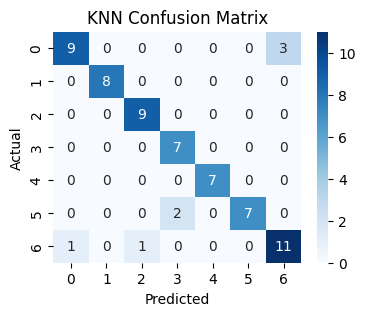

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
train_and_plot_model(knn_model, 'KNN')

### Decision Tree

Accuracy: 0.8000
Precision: 0.8518
Recall: 0.8000
F1 score: 0.8023
----------------------------


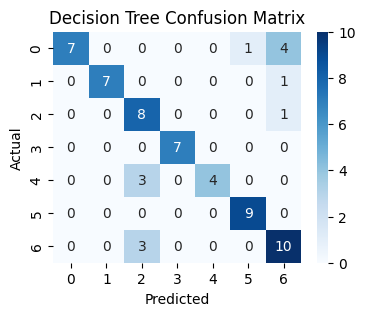

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
train_and_plot_model(dt_model, 'Decision Tree')

### Naive Bayes

Accuracy: 0.8308
Precision: 0.8650
Recall: 0.8308
F1 score: 0.8248
----------------------------


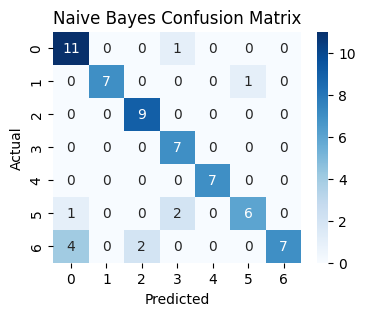

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
train_and_plot_model(nb_model, 'Naive Bayes')

### Logistic Regression

Accuracy: 0.9385
Precision: 0.9447
Recall: 0.9385
F1 score: 0.9388
----------------------------


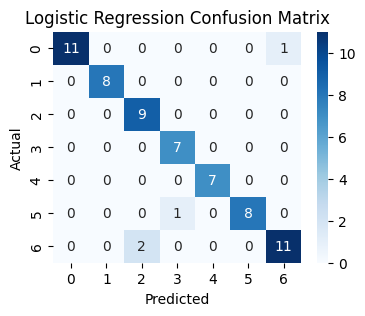

In [18]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression(random_state=42)
train_and_plot_model(regression_model, 'Logistic Regression')

### Gradient Boosting

Accuracy: 0.8154
Precision: 0.8320
Recall: 0.8154
F1 score: 0.8134
----------------------------


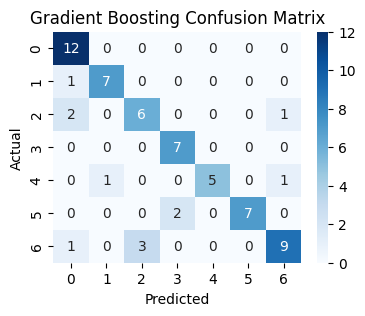

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
train_and_plot_model(gb_model, 'Gradient Boosting')

### Model Comparison

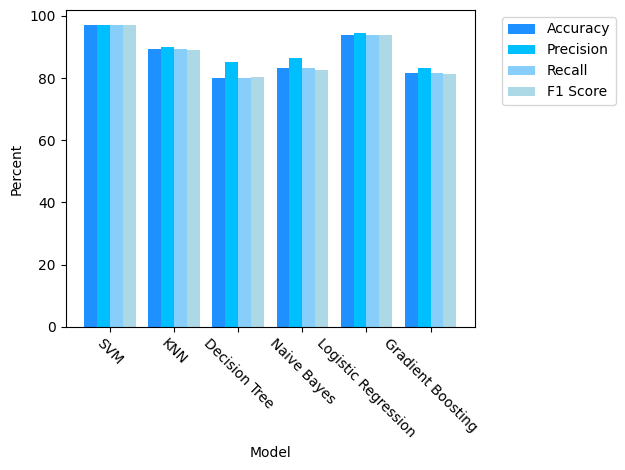

In [20]:
x = np.arange(len(models))  
width = 0.2                

plt.bar(x - 1.5*width, model_accuracies, width, label='Accuracy', color='dodgerblue')
plt.bar(x - 0.5*width, model_precisions, width, label='Precision', color='deepskyblue')
plt.bar(x + 0.5*width, model_recalls, width, label='Recall', color='lightskyblue')
plt.bar(x + 1.5*width, model_f1scores, width, label='F1 Score', color='lightblue')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(x, labels=models, rotation=-45)
plt.xlabel('Model')
plt.ylabel('Percent')

plt.tight_layout()
plt.show()

### Volume

In [21]:
# accuracy plot
models = []
model_accuracies = []
model_precisions = []
model_recalls = []
model_f1scores = []

x = df.drop(columns=['volume', 'substance'])
y = df['volume']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)  
print(y_train.shape)  

(258, 242)
(258,)


C:\Users\chloe\AppData\Local\Temp\ipykernel_29956\1694633448.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


Accuracy: 0.8462
Precision: 0.8467
Recall: 0.8462
F1 score: 0.8454
----------------------------


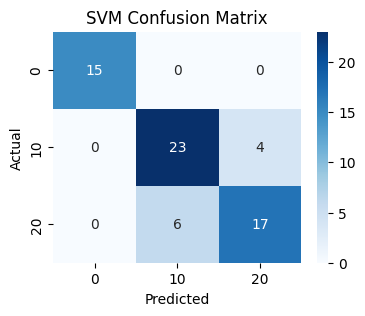

In [22]:
train_and_plot_model(svm_model, 'SVM')

Accuracy: 0.9231
Precision: 0.9351
Recall: 0.9231
F1 score: 0.9216
----------------------------


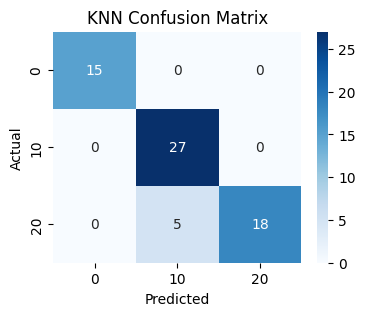

In [23]:
train_and_plot_model(knn_model, 'KNN')

Accuracy: 0.8308
Precision: 0.8370
Recall: 0.8308
F1 score: 0.8301
----------------------------


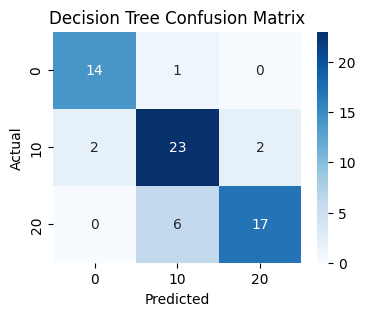

In [24]:
train_and_plot_model(dt_model, 'Decision Tree')

Accuracy: 0.8000
Precision: 0.7966
Recall: 0.8000
F1 score: 0.7972
----------------------------


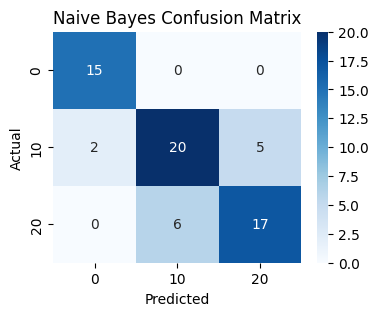

In [25]:
train_and_plot_model(nb_model, 'Naive Bayes')

Accuracy: 0.8769
Precision: 0.8778
Recall: 0.8769
F1 score: 0.8763
----------------------------


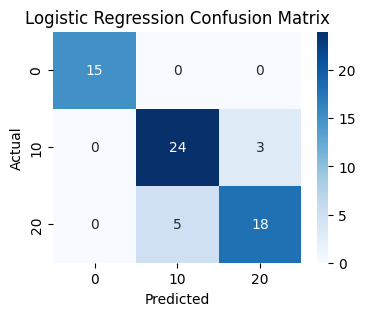

In [26]:
train_and_plot_model(regression_model, 'Logistic Regression')

Accuracy: 0.8923
Precision: 0.8938
Recall: 0.8923
F1 score: 0.8928
----------------------------


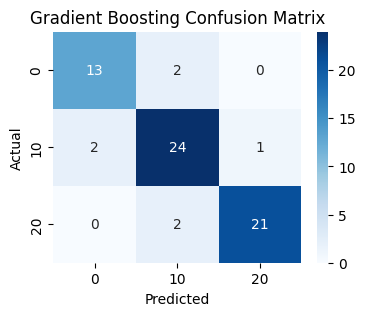

In [27]:
train_and_plot_model(gb_model, 'Gradient Boosting')

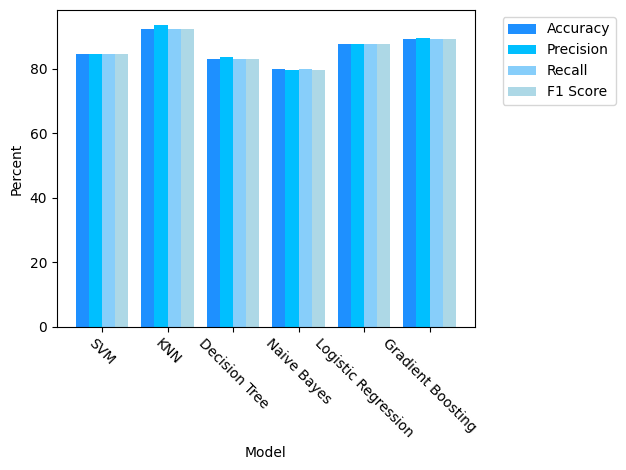

In [28]:
x = np.arange(len(models))  
width = 0.2                

plt.bar(x - 1.5*width, model_accuracies, width, label='Accuracy', color='dodgerblue')
plt.bar(x - 0.5*width, model_precisions, width, label='Precision', color='deepskyblue')
plt.bar(x + 0.5*width, model_recalls, width, label='Recall', color='lightskyblue')
plt.bar(x + 1.5*width, model_f1scores, width, label='F1 Score', color='lightblue')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(x, labels=models, rotation=-45)
plt.xlabel('Model')
plt.ylabel('Percent')

plt.tight_layout()
plt.show()

# Multi Label Classification

In [42]:
label_names = ['Substance', 'Volume']

# accuracies
models = []
model_exact_accuracies = [] # predicts both labels right

def train_and_plot_multioutput_model(model, model_name, cm=True):
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    # Exact match accuracy (all labels correct)
    exact_match_accuracy = np.mean(np.all(y_test.values == y_pred, axis=1))

    # Per-label accuracy
    per_label_accuracy = (y_test == y_pred).mean(axis=0)
    average_label_accuracy = per_label_accuracy.mean()

    models.append(model_name)
    model_exact_accuracies.append(exact_match_accuracy * 100)

    print(model_name)
    print(f'Exact Match Accuracy: {exact_match_accuracy:.4f}')
    print(f'Average Per-Label Accuracy: {average_label_accuracy:.4f}')
    print(f'Per-Label Accuracies: {per_label_accuracy.values if hasattr(per_label_accuracy, "values") else per_label_accuracy}')
    print('----------------------------')

    # Confusion matrices for each label
    if cm == True:
        for i, col in enumerate(y_test.columns):
            cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
            plt.figure(figsize=(4, 3))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'{model_name} Confusion Matrix, {label_names[i]}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

In [43]:
x = df.drop(columns=['volume', 'substance'])
y = df[['substance', 'volume']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)  
print(y_train.shape)  

(258, 242)
(258, 2)


C:\Users\chloe\AppData\Local\Temp\ipykernel_29956\437239220.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


In [46]:
from sklearn.multioutput import MultiOutputClassifier

svm_model = svm.SVC(kernel='linear', random_state=42)
model = MultiOutputClassifier(svm_model)
train_and_plot_multioutput_model(model, 'SVM', cm=False)

model = MultiOutputClassifier(knn_model)
train_and_plot_multioutput_model(model, 'KNN', cm=False)

model = MultiOutputClassifier(dt_model)
train_and_plot_multioutput_model(model, 'Decision Tree', cm=False)

model = MultiOutputClassifier(nb_model)
train_and_plot_multioutput_model(model, 'Naive Bayes', cm=False)

model = MultiOutputClassifier(regression_model)
train_and_plot_multioutput_model(model, 'Logistic Regression', cm=False)

model = MultiOutputClassifier(gb_model)
train_and_plot_multioutput_model(model, 'Gradient Boosting', cm=False)

SVM
Exact Match Accuracy: 0.8308
Average Per-Label Accuracy: 0.9077
Per-Label Accuracies: [0.96923077 0.84615385]
----------------------------
KNN
Exact Match Accuracy: 0.8923
Average Per-Label Accuracy: 0.9077
Per-Label Accuracies: [0.89230769 0.92307692]
----------------------------
Decision Tree
Exact Match Accuracy: 0.6769
Average Per-Label Accuracy: 0.8154
Per-Label Accuracies: [0.8        0.83076923]
----------------------------
Naive Bayes
Exact Match Accuracy: 0.7231
Average Per-Label Accuracy: 0.8154
Per-Label Accuracies: [0.83076923 0.8       ]
----------------------------
Logistic Regression
Exact Match Accuracy: 0.8462
Average Per-Label Accuracy: 0.9077
Per-Label Accuracies: [0.93846154 0.87692308]
----------------------------
Gradient Boosting
Exact Match Accuracy: 0.7538
Average Per-Label Accuracy: 0.8538
Per-Label Accuracies: [0.81538462 0.89230769]
----------------------------


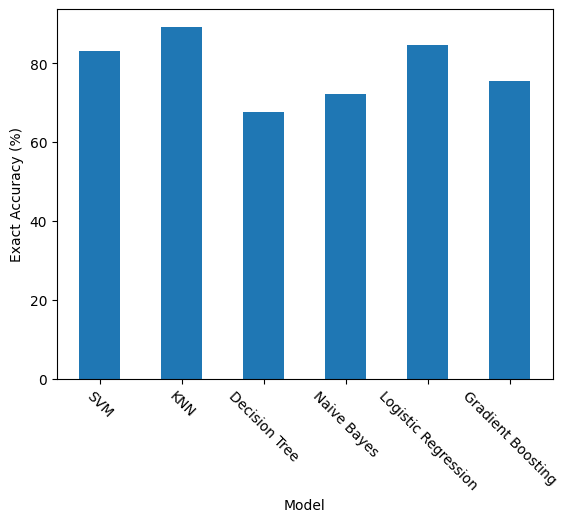

In [32]:
plt.bar(models, model_exact_accuracies, width=0.5)

plt.xticks(rotation=-45)
plt.xlabel('Model')
plt.ylabel('Exact Accuracy (%)')

plt.show()

In [33]:
import csv

with open('multioutput_bandpass_accuracies.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(model_exact_accuracies)